In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [35]:
data=pd.read_csv('diabetes.csv')
data

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  Outcome  
0                       0.627   50        1  
1                       0.351   31        0  
2                       0.672   32        1  
3                       0.167   21        0  
4                       2.288   33        1  
..                        ...  ...      ...  
763                     0.171   63        0  
764                     0.340   27        0  
765                     0.245   30        0  
766                     0.349   47        1  
767                     0.315   23        0  

[768 rows x 9 columns]

In [36]:
data.shape


(768, 9)

In [37]:
data.describe()

Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    31.992578                  0.471876   33.240885    0.348958  
std      7.884160                  0.331329   11.760232    0.476951  
min      0.000000                  0.078000   21.000000    0.000000  
25%     27.300000                  0.243750   24.000000    0.000000  
50%     32.000000                  0.372500   29.000000    0.000000  
75%     36.600000                  0.626250   41.000000    1.000000  
max     67.100000                  2.420000   81.000000    1.000000

In [38]:
missing_val=data.isna().sum()
missing_val

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [39]:
corr_data=data.corr()
corr_data

Pregnancies   Glucose  BloodPressure  SkinThickness  \
Pregnancies                  1.000000  0.129459       0.141282      -0.081672   
Glucose                      0.129459  1.000000       0.152590       0.057328   
BloodPressure                0.141282  0.152590       1.000000       0.207371   
SkinThickness               -0.081672  0.057328       0.207371       1.000000   
Insulin                     -0.073535  0.331357       0.088933       0.436783   
BMI                          0.017683  0.221071       0.281805       0.392573   
DiabetesPedigreeFunction    -0.033523  0.137337       0.041265       0.183928   
Age                          0.544341  0.263514       0.239528      -0.113970   
Outcome                      0.221898  0.466581       0.065068       0.074752   

                           Insulin       BMI  DiabetesPedigreeFunction  \
Pregnancies              -0.073535  0.017683                 -0.033523   
Glucose                   0.331357  0.221071                  0.137337   
BloodPressure             0.088933  0.281805                  0.041265   
SkinThickness             0.436783  0.392573                  0.183928   
Insulin                   1.000000  0.197859                  0.185071   
BMI                       0.197859  1.000000                  0.140647   
DiabetesPedigreeFunction  0.185071  0.140647                  1.000000   
Age                      -0.042163  0.036242                  0.033561   
Outcome                   0.130548  0.292695                  0.173844   

                               Age   Outcome  
Pregnancies               0.544341  0.221898  
Glucose                   0.263514  0.466581  
BloodPressure             0.239528  0.065068  
SkinThickness            -0.113970  0.074752  
Insulin                  -0.042163  0.130548  
BMI                       0.036242  0.292695  
DiabetesPedigreeFunction  0.033561  0.173844  
Age                       1.000000  0.238356  
Outcome                   0.238356  1.000000

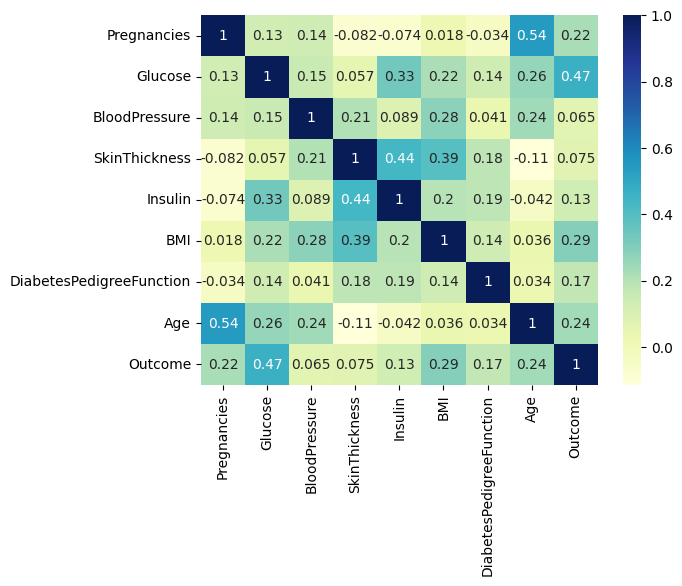

In [40]:
sns.heatmap(corr_data, annot=True,cmap="YlGnBu")
plt.show()

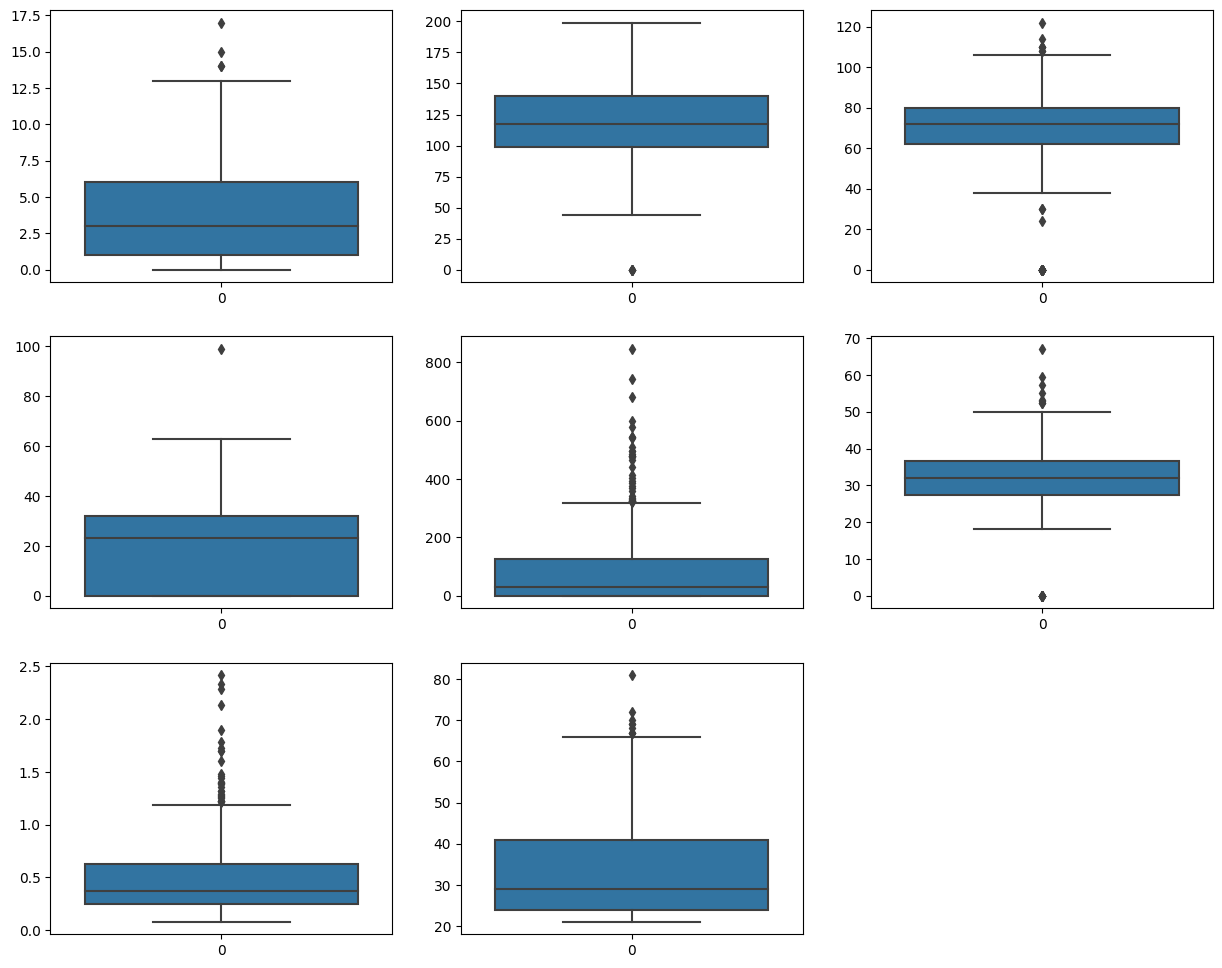

In [41]:
fig = plt.figure(figsize =(15, 12))
plt.subplot(3,3,1)
bp=sns.boxplot(data['Pregnancies'])
plt.subplot(3,3,2)
bp=sns.boxplot(data['Glucose'])
plt.subplot(3,3,3)
bp=sns.boxplot(data['BloodPressure'])
plt.subplot(3,3,4)
bp=sns.boxplot(data['SkinThickness'])
plt.subplot(3,3,5)
bp=sns.boxplot(data['Insulin'])
plt.subplot(3,3,6)
bp=sns.boxplot(data['BMI'])
plt.subplot(3,3,7)
bp=sns.boxplot(data['DiabetesPedigreeFunction'])
plt.subplot(3,3,8)
bp=sns.boxplot(data['Age'])
plt.show()

In [42]:
from numpy import percentile
# calculate interquartile range
q25, q75 = percentile(data, 25), percentile(data, 75)
iqr = q75 - q25
print('Percentiles: 25th=%.3f, 75th=%.3f, IQR=%.3f' % (q25, q75, iqr))
# calculate the outlier cutoff
cut_off = iqr * 1.5
lower, upper = q25 - cut_off, q75 + cut_off
# identify outliers
df = data[~((data < (q25 - 1.5 * iqr)) |(data > (q75 + 1.5 * iqr))).any(axis=1)]
df


Percentiles: 25th=0.462, 75th=61.000, IQR=60.538


Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
3              1       89             66             23       94  28.1   
5              5      116             74              0        0  25.6   
6              3       78             50             32       88  31.0   
..           ...      ...            ...            ...      ...   ...   
762            9       89             62              0        0  22.5   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  Outcome  
0                       0.627   50        1  
1                       0.351   31        0  
3                       0.167   21        0  
5                       0.201   30        0  
6                       0.248   26        1  
..                        ...  ...      ...  
762                     0.142   33        0  
764                     0.340   27        0  
765                     0.245   30        0  
766                     0.349   47        1  
767                     0.315   23        0  

[536 rows x 9 columns]

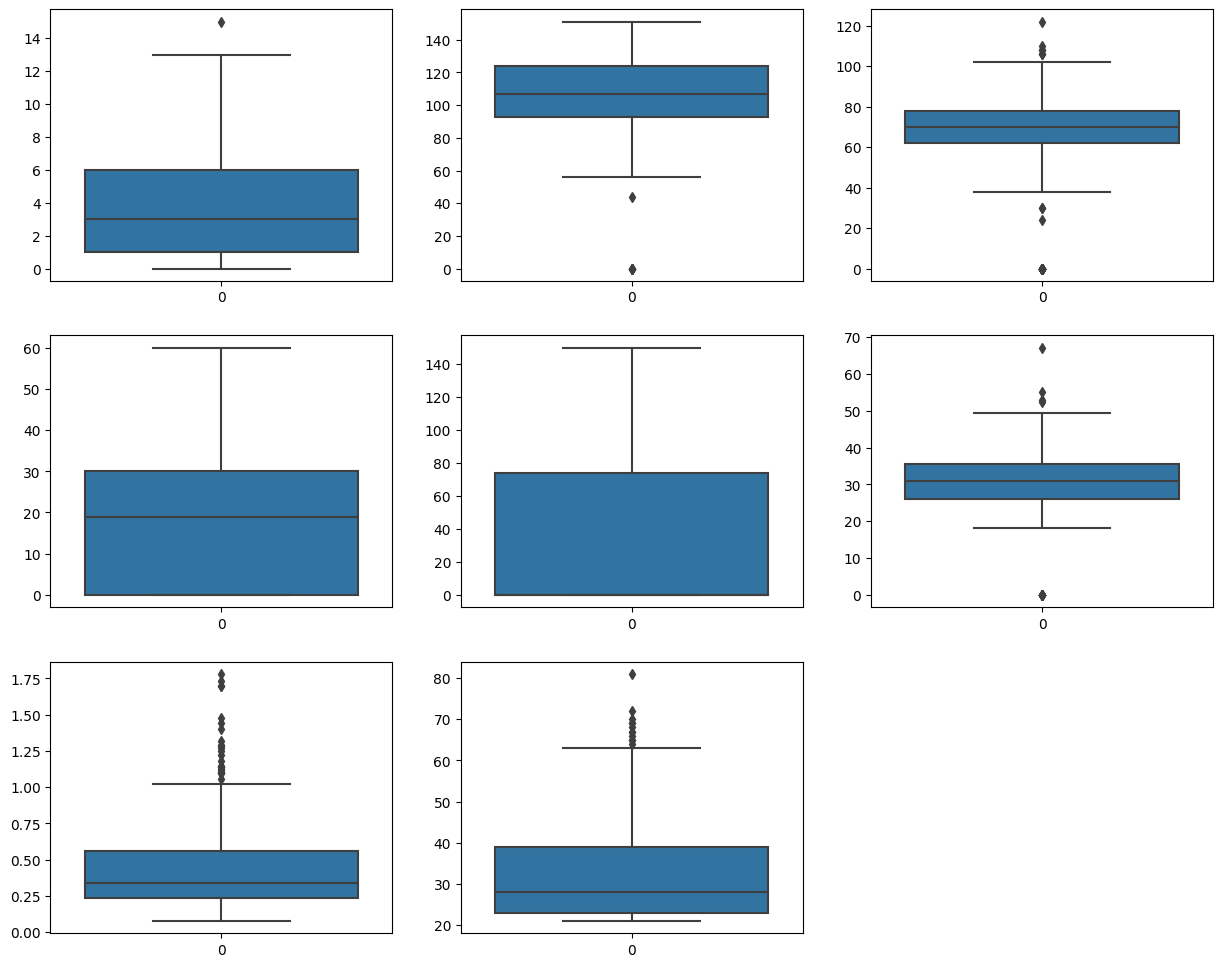

In [43]:
fig = plt.figure(figsize =(15, 12))
plt.subplot(3,3,1)
bp=sns.boxplot(df['Pregnancies'])
plt.subplot(3,3,2)
bp=sns.boxplot(df['Glucose'])
plt.subplot(3,3,3)
bp=sns.boxplot(df['BloodPressure'])
plt.subplot(3,3,4)
bp=sns.boxplot(df['SkinThickness'])
plt.subplot(3,3,5)
bp=sns.boxplot(df['Insulin'])
plt.subplot(3,3,6)
bp=sns.boxplot(df['BMI'])
plt.subplot(3,3,7)
bp=sns.boxplot(df['DiabetesPedigreeFunction'])
plt.subplot(3,3,8)
bp=sns.boxplot(df['Age'])
plt.show()

In [44]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error, r2_score

In [45]:

# X = feature values, all the columns except the species column
X = data.iloc[:, :-1]
display(X)

# y = target values, only the species column
y = data.iloc[:, -1]
display(y)

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  
0                       0.627   50  
1                       0.351   31  
2                       0.672   32  
3                       0.167   21  
4                       2.288   33  
..                        ...  ...  
763                     0.171   63  
764                     0.340   27  
765                     0.245   30  
766                     0.349   47  
767                     0.315   23  

[768 rows x 8 columns]

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64

In [46]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [47]:

#Train the model
model = LogisticRegression(verbose=1)
model.fit(x_train, y_train) #Training the model

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            9     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.25592D+02    |proj g|=  7.37050D+03

At iterate   50    f=  3.73430D+02    |proj g|=  1.32122D+02

At iterate  100    f=  2.90810D+02    |proj g|=  4.94892D+02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    9    100    112      1     0     0   4.949D+02   2.908D+02
  F =   290.80979408501042     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
 This problem is unconstrained.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


LogisticRegression(verbose=1)

In [48]:
#Test the model
predictions = model.predict(x_test)
print(predictions)# printing predictions

print()# Printing new line

#Check precision, recall, f1-score
print( classification_report(y_test, predictions) )

[0 1 1 1 0 0 1 1 1 0 0 0 0 0 0 1 1 0 0 0 0 1 0 0 0 0 1 0 1 0 1 0 0 0 1 1 0
 0 1 0 0 0 0 1 0 0 1 0 0 1 1 1 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 1 0 0
 1 0 0 1 0 0 1 0 1 0 0 1 0 1 0 0 0 1 0 0 1 0 0 1 0 1 0 0 0 0 1 1 1 0 1 0 0
 0 0 0 0 0 0 0 0 1 0 1 0 1 0 0 0 1 0 0 1 0 0 0 0 1 1 0 0 0 0 0 0 1 1 1 0 1
 0 0 1 0 0 0]

              precision    recall  f1-score   support

           0       0.78      0.84      0.81        96
           1       0.70      0.60      0.65        58

    accuracy                           0.75       154
   macro avg       0.74      0.72      0.73       154
weighted avg       0.75      0.75      0.75       154



# Using KNN method 

In [49]:
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist
distortions = []
inertias = []
mapping1 = {}
mapping2 = {}
K = range(1, 10)
 
for k in K:
    # Building and fitting the model
    kmeanModel = KMeans(n_clusters=k).fit(X)
    kmeanModel.fit(X)
 
    distortions.append(sum(np.min(cdist(X, kmeanModel.cluster_centers_,
                                        'euclidean'), axis=1)) / X.shape[0])
    inertias.append(kmeanModel.inertia_)
 
    mapping1[k] = sum(np.min(cdist(X, kmeanModel.cluster_centers_,
                                   'euclidean'), axis=1)) / X.shape[0]
    mapping2[k] = kmeanModel.inertia_

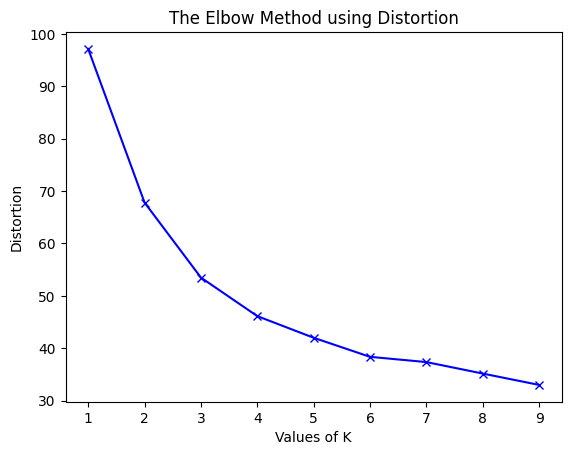

In [50]:

plt.plot(K, distortions, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Distortion')
plt.title('The Elbow Method using Distortion')
plt.show()

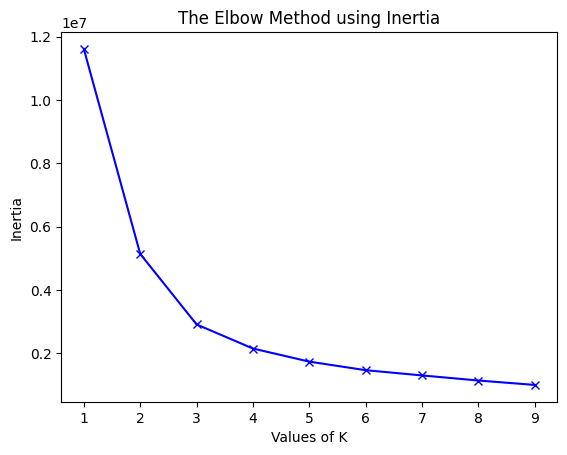

In [51]:
plt.plot(K, inertias, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Inertia')
plt.title('The Elbow Method using Inertia')
plt.show()

In [52]:
### Using KNN Classifier for model building 

from sklearn.neighbors import KNeighborsClassifier
KNN = KNeighborsClassifier(n_neighbors=7)
KNN.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=7)

In [53]:
pred = KNN.predict(x_test)
pred

array([0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0])

In [54]:

#validation of built model
from sklearn.metrics import accuracy_score

print('The accuracy of the KNN with K=3 is {}%'.format(round(accuracy_score(pred,y_test)*100,2)))

The accuracy of the KNN with K=3 is 73.38%


# After removing outliers

# Logistic regression algorithm

In [55]:
# X = feature values, all the columns except the species column
X = df.iloc[:, :-1]
display(X)

# y = target values, only the species column
y = df.iloc[:, -1]
display(y)

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
3              1       89             66             23       94  28.1   
5              5      116             74              0        0  25.6   
6              3       78             50             32       88  31.0   
..           ...      ...            ...            ...      ...   ...   
762            9       89             62              0        0  22.5   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  
0                       0.627   50  
1                       0.351   31  
3                       0.167   21  
5                       0.201   30  
6                       0.248   26  
..                        ...  ...  
762                     0.142   33  
764                     0.340   27  
765                     0.245   30  
766                     0.349   47  
767                     0.315   23  

[536 rows x 8 columns]

0      1
1      0
3      0
5      0
6      1
      ..
762    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 536, dtype: int64

In [56]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [57]:
#Train the model
model = LogisticRegression(verbose=1)
model.fit(x_train, y_train)

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            9     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.96667D+02    |proj g|=  1.10990D+04

At iterate   50    f=  2.02517D+02    |proj g|=  4.42026D+01

At iterate  100    f=  1.97367D+02    |proj g|=  4.69292D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    9    100    117      1     0     0   4.693D-01   1.974D+02
  F =   197.36675032332181     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
 This problem is unconstrained.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


LogisticRegression(verbose=1)

In [58]:
#Test the model
predictions = model.predict(x_test)
print(predictions)# printing predictions

print()# Printing new line

#Check precision, recall, f1-score
print( classification_report(y_test, predictions) )

[1 1 0 0 0 1 0 0 0 0 1 0 1 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0
 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0]

              precision    recall  f1-score   support

           0       0.84      0.98      0.90        82
           1       0.85      0.42      0.56        26

    accuracy                           0.84       108
   macro avg       0.84      0.70      0.73       108
weighted avg       0.84      0.84      0.82       108



# KNN Algotithm

In [59]:
KNN = KNeighborsClassifier(n_neighbors=7)
KNN.fit(x_train, y_train)
pred = KNN.predict(x_test)
pred

array([1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [60]:
#validation of built model
from sklearn.metrics import accuracy_score

print('The accuracy of the KNN with K=7 is {}%'.format(round(accuracy_score(pred,y_test)*100,2)))

The accuracy of the KNN with K=7 is 82.41%


In [61]:
import pickle

In [62]:
pkl_filename= "knn_pickle.pkl"

with open("knn_pickle.pkl", "wb") as f:
    pickle.dump(KNN,f)

In [63]:
with open(pkl_filename, "rb") as f:
    model = pickle.load(f)

In [64]:
import gradio as gr

In [65]:
def make_prediction(Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age):
    with open(pkl_filename, "rb") as f:
        model  = pickle.load(f)
        preds = model.predict([[Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age]])
    if preds == 1:
            return "patient having diabetese"
    return "patient does not have diabetese"

#Create the input component for Gradio since we are expecting 4 inputs

Pregnancies=gr.Number(label = "Preg_number")
Glucose= gr.Number(label = "glucose level")
BP = gr.Number(label = "BP Level")
SkinThickness = gr.Number(label = "Pkin thickness")
Insulin = gr.Number(label = "insulin level")
BMI= gr.Number(label = "BMI Level")
Dpf = gr.Number(label = "dpf")
Age= gr.Number(label = "Patients age")
# We create the output
output = gr.Textbox()


app = gr.Interface(fn = make_prediction, inputs=[Pregnancies, Glucose, BP, SkinThickness, Insulin, BMI, Dpf, Age], outputs=output)
app.launch(share =True)

Running on local URL:  http://127.0.0.1:7862

Setting up a public link... we have recently upgraded the way public links are generated. If you encounter any problems, please report the issue and downgrade to gradio version 3.13.0
.
Running on public URL: https://d94a2ec9-ca36-46c1.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades (NEW!), check out Spaces: https://huggingface.co/spaces
